# Image Classification

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
# Read Images
# img = mpimg.imread('Dataset/Train/egg ballado/4c2cd42040c108f95bb2484ee0b00590.jpg')

# Output Images
# plt.imshow(img)

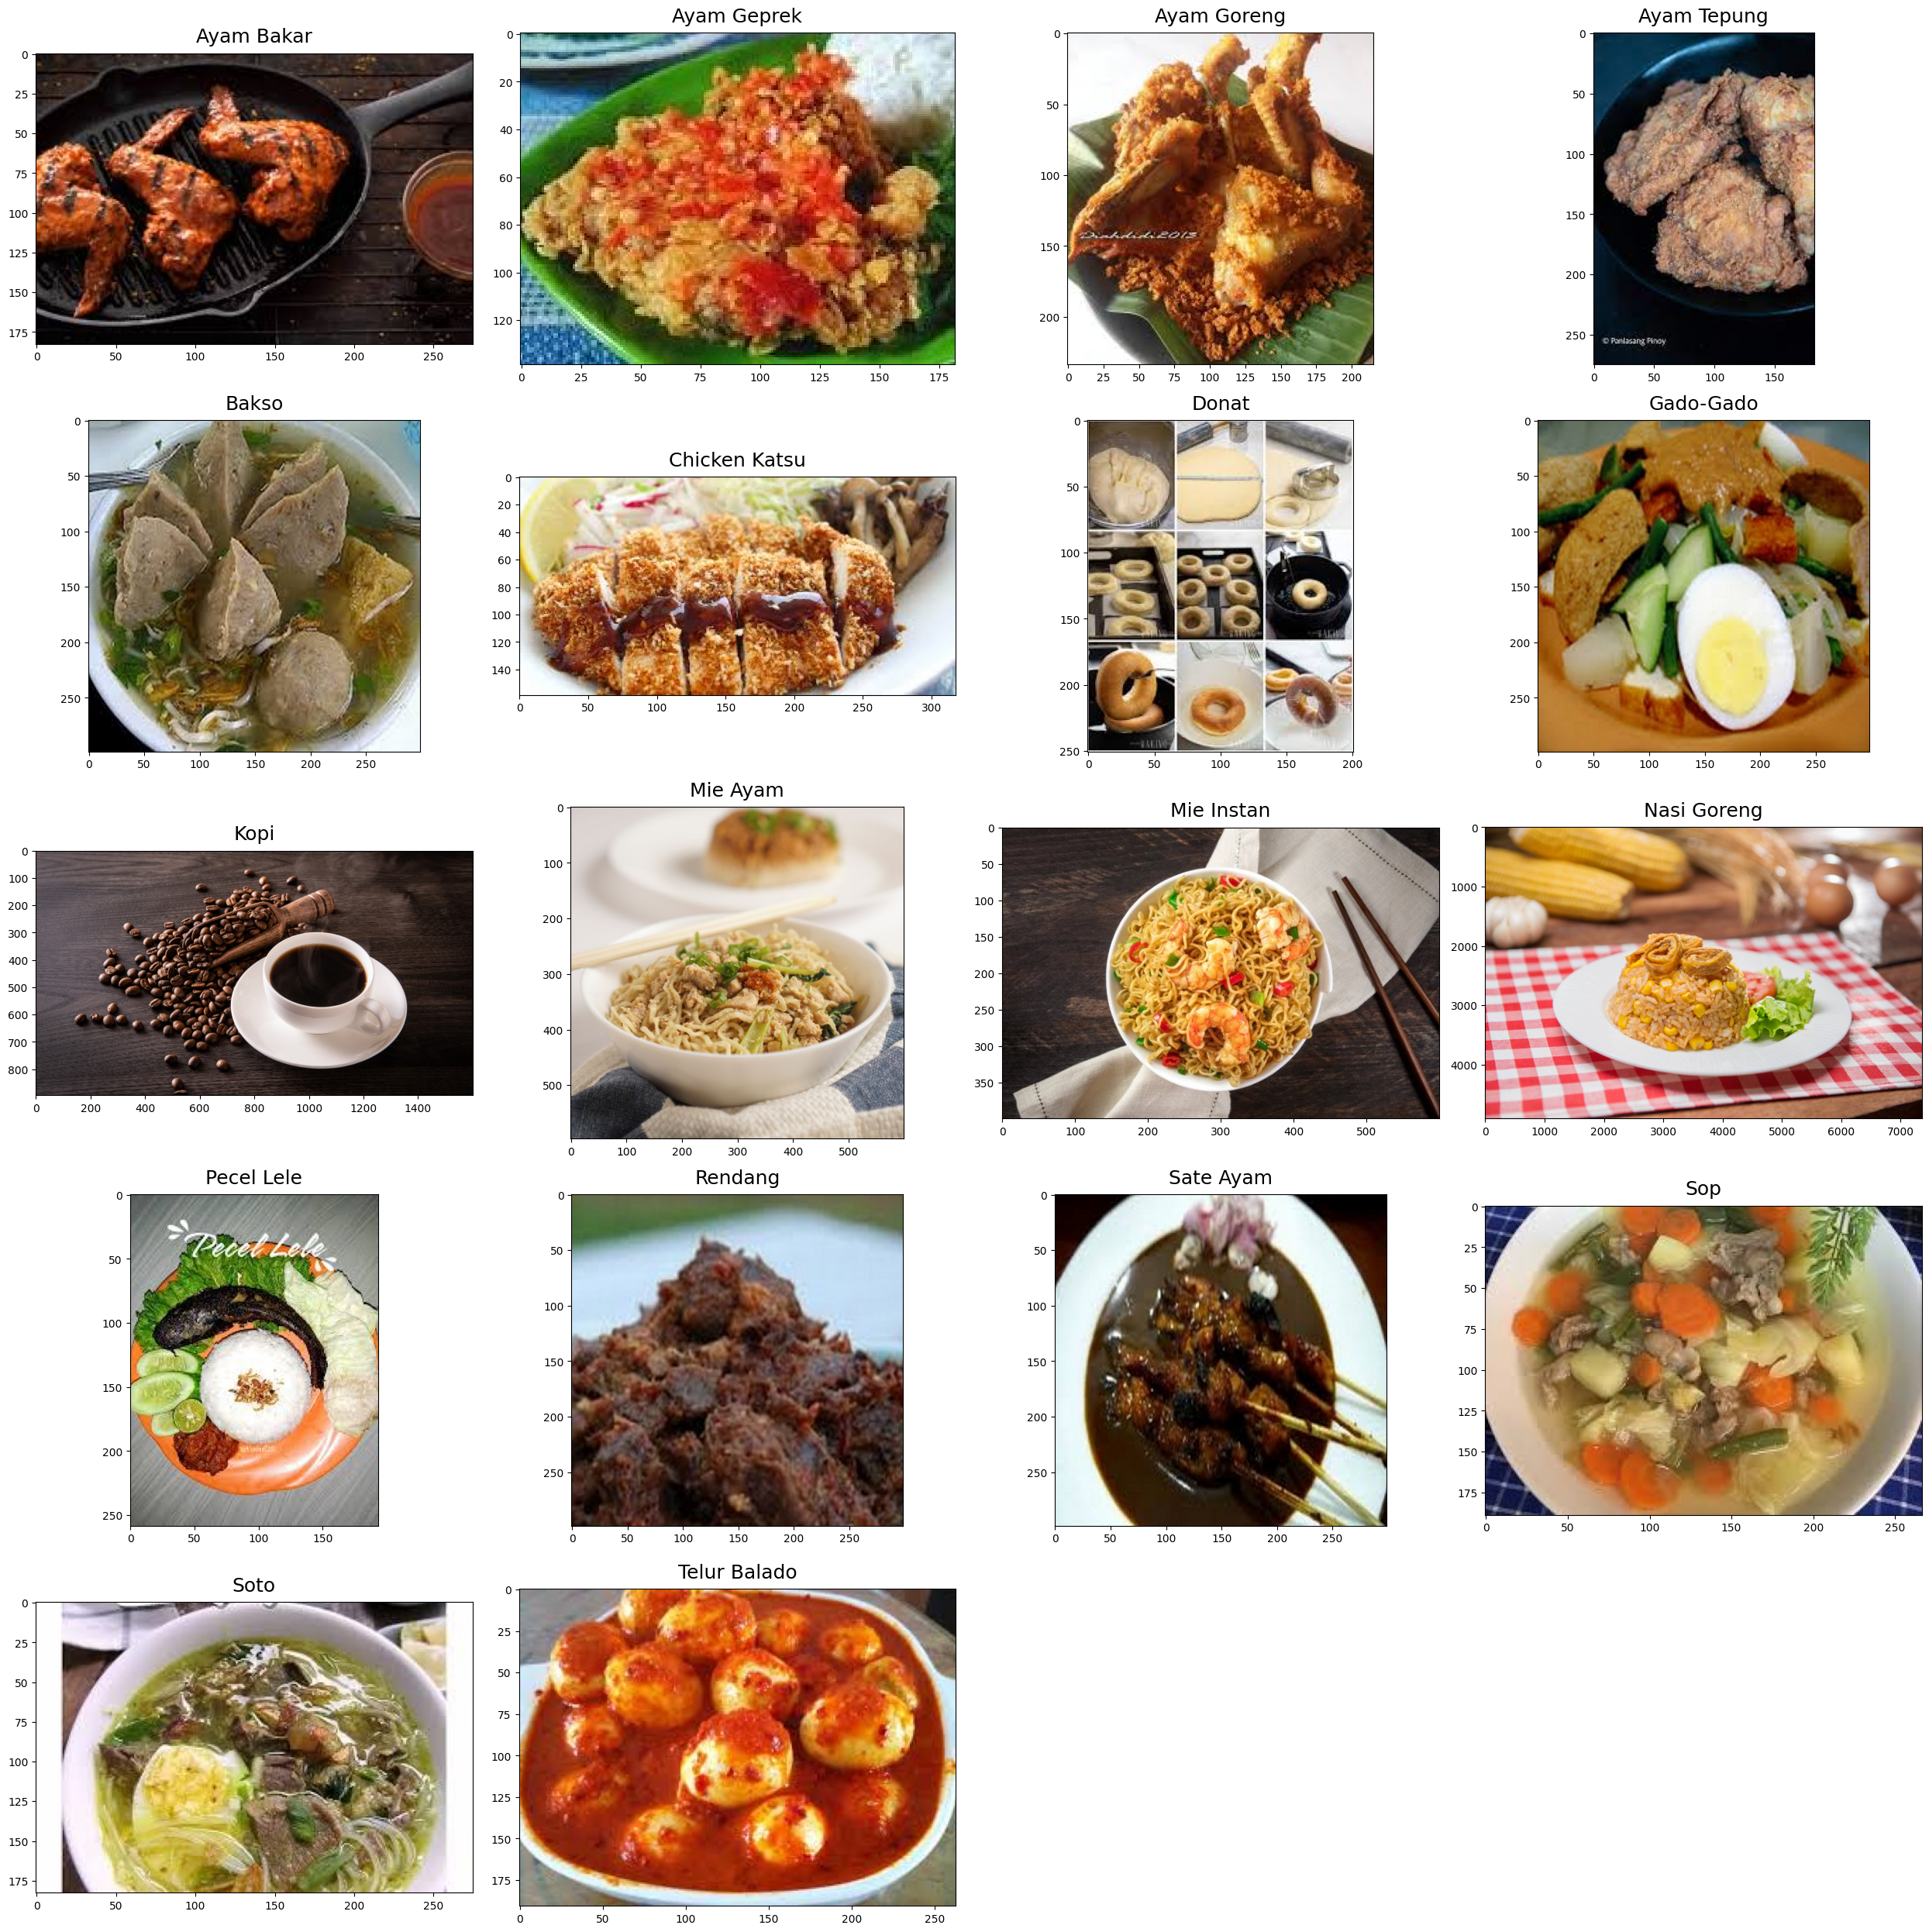

In [2]:
train_dir = "Image Eye\Train"
test_dir = "Image Eye\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255,
                                                                rotation_range=50,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.5,
                                                                horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128,128),
                                                    batch_size=62,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(128, 128),
                                                    batch_size=62,
                                                    class_mode='categorical')

Found 4859 images belonging to 18 classes.
Found 1225 images belonging to 18 classes.


Pakai MobileNet ngga usah pakai link kaya Inception, langsung dipanggil aja tinggal ganti versionnya aja.

Referensi: https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/blob/main/Transfer_learning_with_MobileNet_v1-Copy1.md#3

Sumber coursera : https://colab.research.google.com/drive/1gfaEHcPhTgab4emO8FE8f-TxdZ4mTLV8?authuser=1 (Cuma pakai inception sih)

In [5]:
# # Convert generator to TensorFlow dataset
# train_dataset = tf.data.Dataset.from_generator(
#     lambda: train_generator,
#     output_types=(tf.float32, tf.float32),
#     output_shapes=([None, 224, 224, 3], [None, 14])
# )

# # Repeat the dataset
# train_dataset = train_dataset.repeat()

In [6]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

fn_layers = len(base_model.layers) - int(0.5 * len(base_model.layers))

#Freezing the Base Layer
for layer in base_model.layers[:fn_layers]:
    layer.trainable = False

# last_layer = base_model.get_layer('conv_dw_8_relu')

# base_model.summary()

In [7]:
trainable_layers = [layer.name for layer in base_model.layers if layer.trainable]
print("Trainable Layers:")
for layer in trainable_layers:
    print(layer)

Trainable Layers:
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
conv_pw_12_relu
conv_dw_13
conv_dw_13_bn
conv_dw_13_relu
conv_pw_13
conv_pw_13_bn
conv_pw_13_relu


Lanjut masukin model

In [8]:
model1 = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # tf.keras.layers.Dense(1024, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  # tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Dense(18, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.90 and logs.get('accuracy') > 0.95):
        # Stop if threshold is met
        print("\nSAMPAIII")
        self.model.stop_training = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Instantiate class
callbacks = myCallback()

In [9]:
# AKURASI AWALNYA 0.2 

history_mobileNet=model1.fit(train_generator,
                    validation_data=test_generator,
                    epochs=20, verbose=1, callbacks = callbacks)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/20


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.3007 - loss: 6.6019 - val_accuracy: 0.5780 - val_loss: 1.5824
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.6802 - loss: 1.0447 - val_accuracy: 0.6318 - val_loss: 1.3845
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7442 - loss: 0.8633 - val_accuracy: 0.5714 - val_loss: 1.8945
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.7844 - loss: 0.7527 - val_accuracy: 0.6629 - val_loss: 1.4484
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.7945 - loss: 0.7062 - val_accuracy: 0.6808 - val_loss: 1.3349
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8287 - loss: 0.5907

KeyboardInterrupt: 

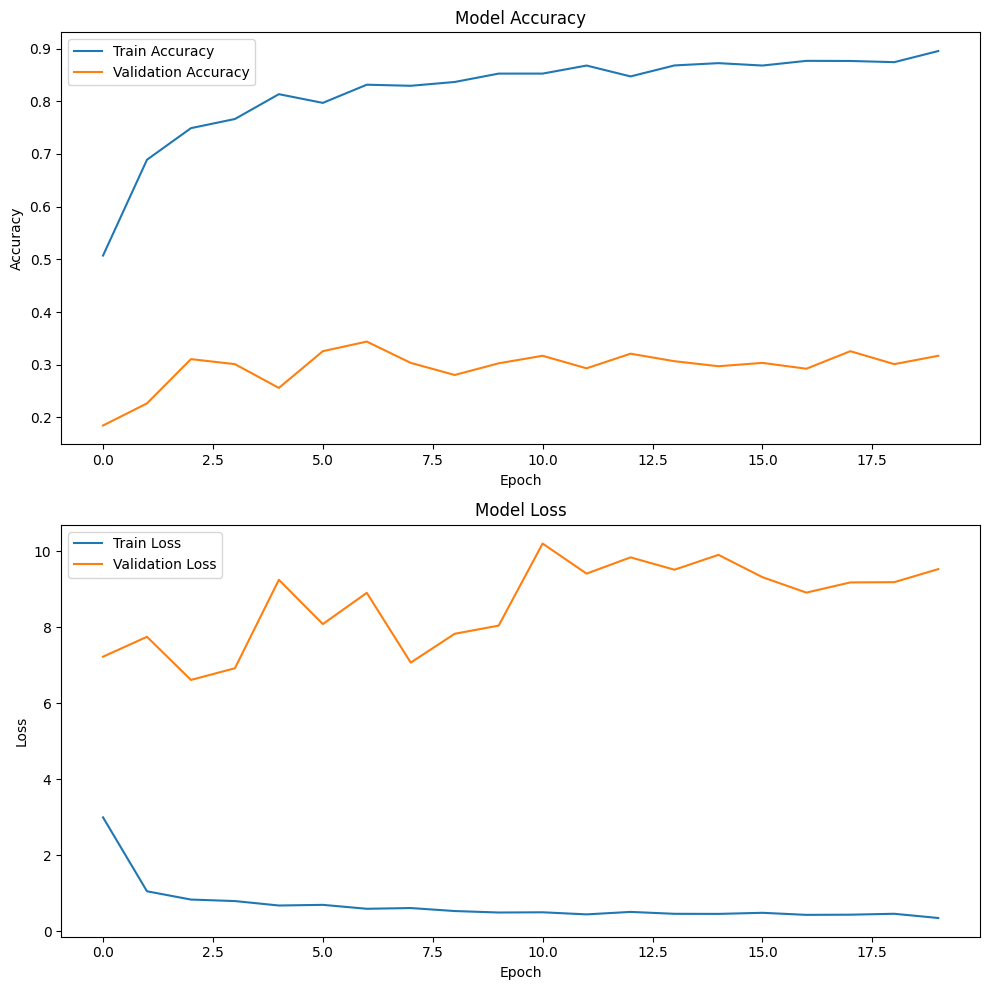

In [ ]:
def plot_accuracy_loss(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='best')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_accuracy_loss(history_mobileNet)


In [ ]:
from sklearn.metrics import f1_score, classification_report
import pandas as pd

# Membuat prediksi pada data uji
y_pred = model1.predict(test_generator)
y_true = test_generator.classes

# Menggunakan argmax untuk mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung F1 score untuk setiap kelas
f1_scores = f1_score(y_true, y_pred_classes, average=None)

# Membuat laporan klasifikasi yang mencakup presisi, recall, dan F1 score untuk setiap kelas
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

# Menampilkan F1 score untuk setiap kelas dalam tabel
f1_scores_table = pd.DataFrame({'Class': test_generator.class_indices.keys(), 'F1 Score': f1_scores})
print(f1_scores_table)

# Menampilkan laporan klasifikasi
print("Classification Report:\n", report)


21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 814ms/step
            Class  F1 Score
0      Ayam Bakar  0.012658
1     Ayam Geprek  0.034783
2     Ayam Goreng  0.061856
3     Ayam Tepung  0.037736
4           Bakso  0.105263
5   Chicken Katsu  0.081967
6          Coffee  0.032000
7           Donat  0.000000
8       Gado-Gado  0.000000
9        Mie Ayam  0.051948
10     Mie Instan  0.016000
11    Nasi Goreng  0.068027
12     Pecel Lele  0.093750
13        Rendang  0.081081
14           Sate  0.052632
15            Sop  0.086957
16           Soto  0.046875
17    egg ballado  0.061350
Classification Report:
                precision    recall  f1-score   support

   Ayam Bakar       0.01      0.01      0.01        68
  Ayam Geprek       0.04      0.03      0.03        68
  Ayam Goreng       0.05      0.08      0.06        74
  Ayam Tepung       0.04      0.03      0.04        59
        Bakso       0.10      0.12      0.11        69
Chicken Katsu       0.09      0.07      0.08        69
       Coffee   

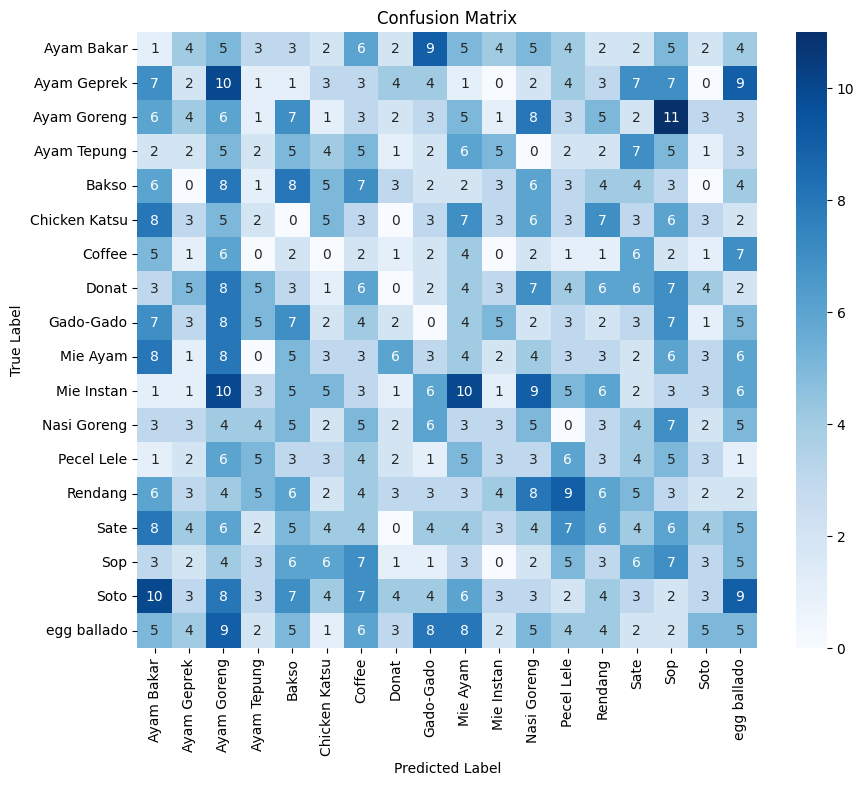

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Mendefinisikan nama kelas
class_names = test_generator.class_indices.keys()

# Membuat confusion matrix dalam bentuk DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Membuat visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class for Image Eye\Dev\ayam bakar dev.jpg is Ayam Bakar
Class index: 0


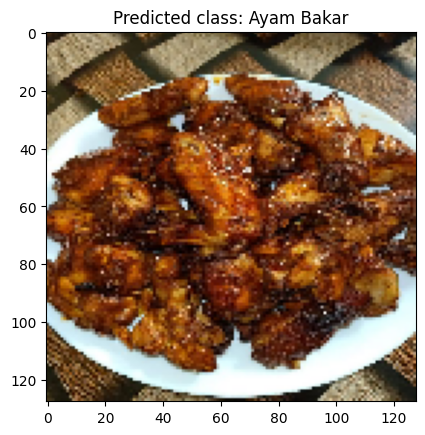

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class for Image Eye\Dev\ayam geprek dev.jpg is Ayam Geprek
Class index: 1


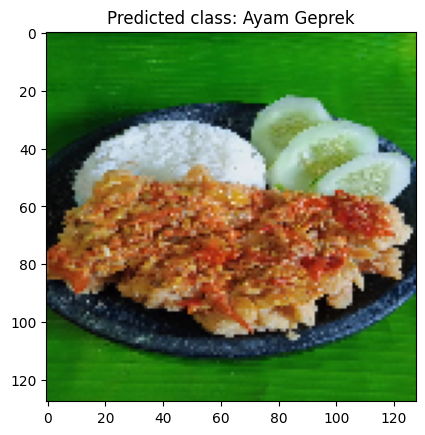

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted class for Image Eye\Dev\ayam goreng dev.jpg is Ayam Bakar
Class index: 0


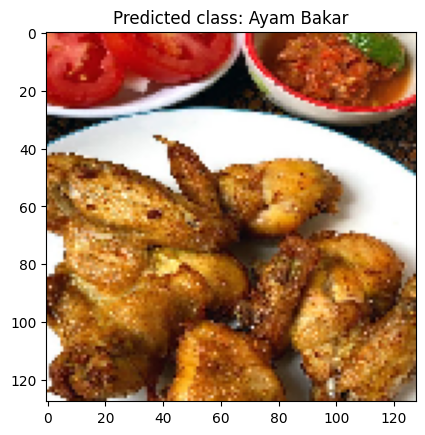

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class for Image Eye\Dev\ayam tepung dev.jpg is Ayam Goreng
Class index: 2


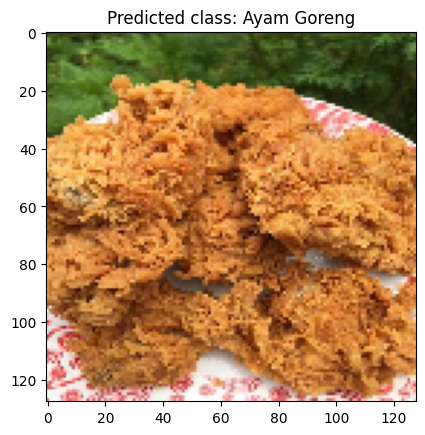

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class for Image Eye\Dev\bakso dev.jpg is Bakso
Class index: 4


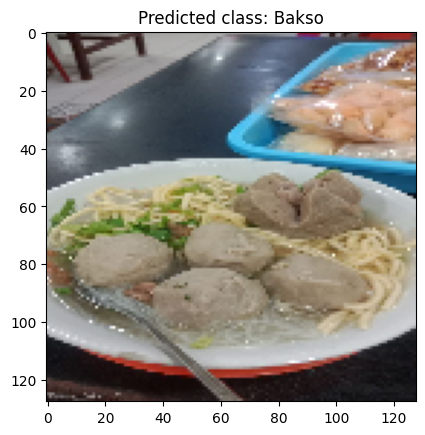

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class for Image Eye\Dev\chicken katsu dev.jpg is Chicken Katsu
Class index: 5


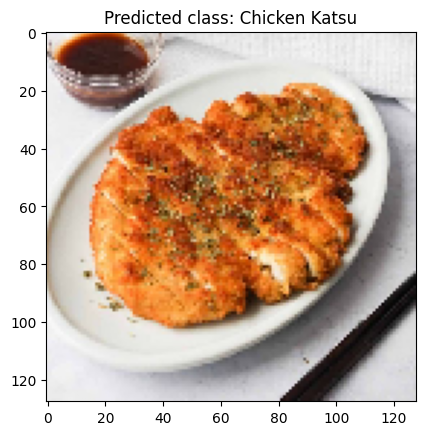

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


IndexError: list index out of range

In [ ]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

class_labels = ["Ayam Bakar", "Ayam Geprek", "Ayam Goreng", "Ayam Tepung", "Bakso","Chicken Katsu", "Donat", "Gado-Gado", "Kopi",
                "Mie Ayam", "Mie Instan", "Nasi Goreng", "Pecel Lele", "Rendang", "Sate", "Sop", "Soto", "Telur Balado"]

# Path to the directory containing your test images
test_dir = os.path.join('Image Eye','Dev')

# Get a list of all image files in the test directory
image_paths = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_paths:
    # Load and preprocess the image using Pillow (PIL)
    img = load_img(image_path, target_size=(128, 128))  # Load and resize the image
    x = img_to_array(img)  # Convert the image to a NumPy array
    x = x / 255.0  # Normalize the pixel values to the range [0, 1]

    # Predict using the model
    yhat = model1.predict(np.expand_dims(x, axis=0))
    predicted_class = np.argmax(yhat, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    print(f'Predicted class for {image_path} is {predicted_label}')
    print(f'Class index: {predicted_class}')

    plt.imshow(x)  # Display the resized image
    plt.title(f'Predicted class: {predicted_label}')
    plt.show()

Predict Nutrition

In [1]:
from tensorflow.keras.utils import load_img, img_to_array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# uploaded = files.upload()
data_makanan = pd.read_csv('nutrisi.csv')
# Definisikan class_names dengan jumlah kelas yang benar
class_names = ['M-001', 'M-002', 'M-003', 'M-004', 'M-005', 'M-006', 'M-007', 'M-008', 'M-009', 'M-010', 'M-011', 'M-012', 'M-013', 'M-014',
               'M-015', 'M-016', 'M-017', 'M-018']

for image_path in image_paths:
    # Menampilkan gambar
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Melakukan prediksi
    img = load_img(image_path, target_size=(128, 128))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Melakukan prediksi
    classes = model1.predict(images)

    # Mencari indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(classes)

    if predicted_class_index < len(class_names):
        predicted_class = class_names[predicted_class_index]

        # Mengambil ID makanan dari nama kelas
        food_id = predicted_class

        # Menampilkan data nutrisi makanan
        nutrition_data = data_makanan[data_makanan['id'] == food_id]
        print(nutrition_data)
    else:
        print("Error: Predicted class index is out of range.")


NameError: name 'image_paths' is not defined